<a href="https://colab.research.google.com/github/eskutza/AnalisisPredictivo/blob/main/colab/clustering_02_tarea_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

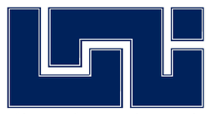

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

~~~Python
Iranzuegi López, Luis Ángel
~~~

# **Tarea Modelo no Supervisado**

# **Clustering:** <font color="#f89938"><h10>**scikit learn** <font> 



# **Carga de librerías necesarias**

## <font color="#333F49"> **Para el análisis de datos y el conjunto de datos** <font>

In [ ]:
import pandas as pd
import numpy as np

## <font color="#333F49"> **Para el preprocesado y el modelo** <font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## <font color="#333F49"> **Para gráficos** <font>

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import altair as alt
import seaborn as sns

## <font color="#333F49">**Para serializar: grabar y recuperar los modelos entrenados** <font>

In [ ]:
import pickle 
import os
from google.colab import files

## <font color="#333F49">**Para las alertas** <font>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Análisis Exploratorio de los Datos y Preprocesamiento de Datos**

## <font color="#333F49">**Descripción del set de datos** <font>

El set de datos hace referencia a distintos indicadores de negocio de una cadena de supermercados en una serie de ciudades.

El set de datos, en una primera lectura, viene delimitado, definido por **dos ejes** que no podemos obviar. 

Por un lado, el **eje del tiempo**. En concreto, los datos,observaciones nos situán en los tres primeros meses de 2019.

Y, por otro lado, el **eje cultural** de un país como es Myanmar o Birmania, es decir, nos referimos a los usos, costumbres, valores de esa sociedad y que deben ser tenidos en cuenta en este proceso explotario de los Datos y también en los siguientes pasos y consideraciones de negocio que se extraigan.

[kaggle, ventas supermercados]( https://www.kaggle.com/aungpyaeap/supermarket-sales)

**Objetivo:** 

Definir un modelo que permita detectar patrones, grupos en función de las observaciones recogidas. De este modo, contar con una segmentación de los y las clientas de nuestra cadena de supermercados que pueda ayudarnos en la implementación de campañas u otras acciones que se estimen de interés para la actividad diaria.

**En este análisis nos vamos a centrar en variables que impliquen explícitamente (Calificiacion) o implícitamente (Total ticket) fidelización con nuestra marca de supermercados, más allá de disponer o no de tarjeta de fidelización**

El dataframe original contiene 17 variables y 1000 observaciones.

Tras realizar un Ánalisis Exploratorio de los Datos (EDA) del mismo, e implementar un modelo para predecir clúster con PyCaret (kmodes, variables categóricas centradas en aspectos de hábitos de consumo y sociodemográficas), resulta un dataframe con 21 variables y 1000 observaciones.


[Análisis Explotarorio de los datos](https://github.com/eskutza/AnalisisPredictivo/blob/main/colab/eda_tarea_02.ipynb)

Las variables se definen como:

- **Identificación de la factura:** Número de identificación de la factura del comprobante de venta generado por computadora
- **Ciudad:** Ubicación de los supermercados
- **Tipo_cliente:** Tipo de clientes, clientas registradas como: miembros para clientes, clientas que usan tarjeta de miembro ;y, normal para clientes, clientas sin tarjeta de miembro
- **Género:** Género tipo de cliente, clienta
- **Línea_producto:** Categorías de productos generales: accesorios electrónicos, accesorios de moda, alimentos y bebidas, salud y belleza, hogar y estilo de vida, deportes y viajes
- **Precio_unitario:** Precio de cada producto en $
- **Cantidad:** Número de productos comprados por cliente, clienta
- **Impuesto:** Tasa de impuesto del 5% por compra del cliente, clienta
- **Total:** Precio total abonado por los y las clientas con impuestos incluidos
- **Forma_pago:** Pago utilizado por el cliente para la compra (hay 3 métodos disponibles: efectivo, tarjeta de crédito y billetera electrónica)
- **Coste:** Costo de los bienes vendidos
- **Calificación:** Calificación de estratificación del cliente en su experiencia de compra general (en una escala del 1 al 10) 
- **Fecha2:** Fecha de compra (Registro disponible desde enero de 2019 hasta marzo de 2019)
- **Dia:** Día de compra 
- **Jornada:** Se categorizan los días como laborales y  festivos, atendiendo a la jornada laboral de Myanmar, dia de la semana y las fiestas nacionales en estos tres primeros meses del año
- **Horario:** Se categorizan los actos de compra según el horario donde se han realziado. De mañana (hasta las 13:59), tarde (de 14:00 a las 17:59, tomando como referencia que el horario comercial marca el cierre a las 18:00) y noche (de 18:00 a 21:00). 
- **Calificacion2:** Se categorizan los y las clientas según sea su vinculación, satisfacción con los supermercados objeto de estudio. Detractores cuando valoran su experiencia de compra conuna puntuación inferior a 6.5; Neutros cuando la valoración de dicha experiencia se mueve en un rango de 6.5 a 8.5; y, Promotores cuando su valoración de la experiencia de compra ha sido muy satisfactoria
- **ISG:** el **Indicador de Satisfacción General** nos transforma la categorización de la experiencia de compra en un indicador, una puntuación de los supermercados. Así, otorgaremos un valor de -100 a quienes hayamos calificado como Detractores; un valor de 0 a quines manifiesten una Calificación Neutra; y, una puntuación de 100 a quienes se hallen muy satisfechos con nuestros supermercados. **El rango de este indicador se moverá de -100 (cuando todas las valoraciones sean inferiores a 6.5) a 100 (cuando todas las valoraciones sean superiores a 8.5)**
- **Anomaly:** Si la observación es categorizada o no como outlier (según modelo iforest, 0.05, implementado con PyCaret)
- **Anomaly_Score:** Score que devuelve el modelo implementado al categorizar cada observación como outlier o no (modelo iforest, 0.05, implementado con PyCaret)
- **Cluster:** Si la observación es categorizada como Cluster 0, Cluster 1, Cluster 2 (según modelo kmodes, n_clusters=3, implementado con PyCaret)

[Clustering PyCaret](https://github.com/eskutza/AnalisisPredictivo/blob/main/colab/clustering_01_tarea_02.ipynb)

In [ ]:
url = 'https://raw.githubusercontent.com/eskutza/AnalisisPredictivo/main/Datasets/cluster_01.csv'

In [ ]:
dfo = pd.read_csv(url)
dfo.drop(columns='Unnamed: 0', inplace=True)
dfo

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score,Cluster
0,802-70-5316,Yangon,Miembro,Mujer,Sports and travel,92.13,6,27.639,580.419,Cash,552.78,8.3,2019-03-06,Wednesday,Laboral,Noche,Neutros,0,0,-0.009627,Cluster 2
1,875-46-5808,Mandalay,Miembro,Hombre,Health and beauty,25.90,10,12.950,271.950,Ewallet,259.00,8.7,2019-02-06,Wednesday,Laboral,Tarde,Promotores,100,0,-0.012638,Cluster 1
2,326-78-5178,Naypyitaw,Miembro,Hombre,Food and beverages,91.40,7,31.990,671.790,Cash,639.80,9.5,2019-02-03,Sunday,Festivo,Mañana,Promotores,100,0,-0.015569,Cluster 0
3,127-47-6963,Yangon,Normal,Hombre,Health and beauty,51.71,4,10.342,217.182,Credit card,206.84,9.8,2019-03-09,Saturday,Laboral,Mañana,Promotores,100,0,-0.022262,Cluster 0
4,241-72-9525,Mandalay,Normal,Hombre,Sports and travel,51.91,10,25.955,545.055,Cash,519.10,8.2,2019-02-16,Saturday,Laboral,Mañana,Neutros,0,0,-0.008961,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,430-02-3888,Mandalay,Normal,Hombre,Electronic accessories,46.02,6,13.806,289.926,Cash,276.12,7.1,2019-02-07,Thursday,Laboral,Tarde,Neutros,0,0,-0.037143,Cluster 1
996,267-62-7380,Naypyitaw,Miembro,Hombre,Electronic accessories,82.34,10,41.170,864.570,Ewallet,823.40,4.3,2019-03-29,Friday,Laboral,Noche,Detractores,-100,0,-0.003680,Cluster 2
997,886-18-2897,Yangon,Normal,Mujer,Food and beverages,56.56,5,14.140,296.940,Credit card,282.80,4.5,2019-03-22,Friday,Laboral,Noche,Detractores,-100,0,-0.034201,Cluster 2
998,303-96-2227,Mandalay,Normal,Mujer,Home and lifestyle,97.38,10,48.690,1022.490,Ewallet,973.80,4.4,2019-03-02,Saturday,Festivo,Tarde,Detractores,-100,1,0.014024,Cluster 1


In [ ]:
dfo.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
dfo.shape

(1000, 21)

In [ ]:
dfo.size

21000

## <font color="#333F49"> **Selección de las variables** <font>

In [ ]:
df = pd.read_csv(url, usecols=['Factura', 'Total', 'Calificacion'])

In [ ]:
df.head()

,Factura,Total,Calificacion
0,802-70-5316,580.419,8.3
1,875-46-5808,271.950,8.7
2,326-78-5178,671.790,9.5
3,127-47-6963,217.182,9.8
4,241-72-9525,545.055,8.2


In [ ]:
fig = px.scatter(df,'Calificacion',
                 'Total',
                 template = "gridon")
fig.show()

**Dividimos el set de datos** en un dataframe con datos para definir el modelo y otro dataframe con datos que el modelo no ha visto, para trabajar con ellos posteriormente, una vez definido el modelo.

In [ ]:
datos = df.sample(frac=0.90, random_state=123)
datos_no_vistos = df.drop(datos.index)

In [ ]:
datos.reset_index(inplace=True, drop=True)
datos_no_vistos.reset_index(inplace=True, drop=True)

In [ ]:
print("Datos para Modelar: " + str(datos.shape))
print("Datos no vistos para Predicciones: " + str(datos_no_vistos.shape))

Datos para Modelar: (900, 3)
Datos no vistos para Predicciones: (100, 3)


In [ ]:
datos.head()

,Factura,Total,Calificacion
0,568-88-3448,26.2500,5.5
1,397-25-8725,374.4090,6.8
2,275-28-0149,66.8745,6.0
3,210-74-9613,408.4920,6.8
4,263-12-5321,680.6100,9.3


## <font color="#333F49">**Escala de las variables del Dataframe** <font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Factura       1000 non-null   object 
 1   Total         1000 non-null   float64
 2   Calificacion  1000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


In [ ]:
X=datos[['Total', 'Calificacion']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
normalizacion = StandardScaler()

In [ ]:
X = normalizacion.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=['Total', 'Calificacion'])

In [ ]:
X

,Total,Calificacion
0,-1.203378,-0.868263
1,0.203105,-0.112859
2,-1.039265,-0.577723
3,0.340793,-0.112859
4,1.440088,1.339842
...,...,...
895,-0.965585,0.061465
896,2.221844,-1.507451
897,-1.178013,-0.403399
898,-0.462597,-0.170967


# **Definición del modelo de clustering:** <font color="#0A66C2"><h10>**buscando un perfil en relación con la vinculación con los supermercados** <font> 

Buscamos la alternativa que nos reporte un valor
**inertia** a partir del cual la inertia no disminuya drásticamente y no agregue ningún valor en función de un rango de clústers

## **Primera alternativa:** <font color="#0A66C2"><h10>**K = ?** <font> 

In [ ]:
clusters = pd.DataFrame()
inertia = []

In [ ]:
clusters['cluster_range'] = range (1,11)

In [ ]:
clusters

,cluster_range
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
for n_clusters in clusters['cluster_range']:
  kmeans = KMeans(n_clusters=n_clusters, random_state=123)
  cluster_labels = kmeans.fit(X)
  inertia.append(cluster_labels.inertia_)

In [ ]:
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,1800.000000
1,2,1133.110668
2,3,649.439590
3,4,473.925164
4,5,382.811665
5,6,318.648336
6,7,265.366683
7,8,228.607970
8,9,199.894499
9,10,179.930411


In [ ]:
fig = px.line(clusters, 'cluster_range',
                 'inertia',          
                 template = "gridon")
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=123,
                init='k-means++', n_init=5)
kmeans.fit(X)
print(kmeans)

KMeans(n_clusters=3, n_init=5, random_state=123)


In [ ]:
datos['Cluster_21']=kmeans.predict(X)
datos

,Factura,Total,Calificacion,Cluster_21
0,568-88-3448,26.2500,5.5,0
1,397-25-8725,374.4090,6.8,0
2,275-28-0149,66.8745,6.0,0
3,210-74-9613,408.4920,6.8,0
4,263-12-5321,680.6100,9.3,1
...,...,...,...,...
895,225-98-1496,85.1130,7.1,0
896,852-62-7105,874.1250,4.4,1
897,859-71-0933,32.5290,6.3,0
898,446-47-6729,209.6220,6.7,0


In [ ]:
fig = px.scatter(datos,'Calificacion',
                 'Total',
                 color = 'Cluster_21',
                 color_continuous_scale=['#E9E5DF', '#DB324D', '#576069'],
                 template = 'gridon')
fig.show()

## Segunda alternativa: <font color="#0A66C2"><h10>**K = 4** <font> 

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=123,
                init='k-means++', n_init=5)
kmeans.fit(X)
print(kmeans)

KMeans(n_clusters=4, n_init=5, random_state=123)


In [ ]:
datos['Cluster_22']=kmeans.predict(X)
datos

,Factura,Total,Calificacion,Cluster_21,Cluster_22
0,568-88-3448,26.2500,5.5,0,0
1,397-25-8725,374.4090,6.8,0,0
2,275-28-0149,66.8745,6.0,0,0
3,210-74-9613,408.4920,6.8,0,0
4,263-12-5321,680.6100,9.3,1,3
...,...,...,...,...,...
895,225-98-1496,85.1130,7.1,0,0
896,852-62-7105,874.1250,4.4,1,1
897,859-71-0933,32.5290,6.3,0,0
898,446-47-6729,209.6220,6.7,0,0


**Decimos quedarnos con esta alternativa de 4 clusters**.

In [ ]:
datos.to_csv('cluster_02_modelo_tarea_02.csv') 
files.download('cluster_02_modelo_tarea_02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig = px.scatter(datos,'Calificacion',
                 'Total',
                 color = 'Cluster_22',
                 color_continuous_scale=['#E9E5DF', '#DB324D', '#576069', '#193C75'],
                 template = 'gridon')
fig.show()

## **Guardando el modelo** <font color="#0A66C2"><h10>**KMeans definido(K = 4)** <font> 

In [ ]:
path = '/content/cluster_02_modelo_tarea_02_pred.pkl'

In [ ]:
file = open(path, "wb")
pickle.dump(kmeans, file)

In [ ]:
files.download('cluster_02_modelo_tarea_02_pred.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Leyendo el modelo** <font color="#0A66C2"><h10>**KMeans definido(K = 4)**<font> 

In [ ]:
file = open(path, "rb")
modelo_kmeans = pickle.load(file)

## **Predicción con datos no vistos** <font color="#0A66C2"><h10>**KMeans definido(K = 4)**<font> 

**En los datos no vistos por el modelo, repetimos el ejercicio de normalización realizado con los datos de entrenamiento e implementamos el modelo definido**

In [ ]:
Z = datos_no_vistos[['Total', 'Calificacion']]

In [ ]:
Z = normalizacion.fit_transform(Z)

In [ ]:
Z = pd.DataFrame(Z, columns=['Total', 'Calificacion'])

In [ ]:
nueva_prediccion = modelo_kmeans.predict(Z)
nueva_prediccion

array([3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 3, 3, 2, 2, 1, 3, 3,
       1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 2, 1, 0, 0, 0, 2, 3, 0, 2, 2, 0,
       2, 2, 1, 2, 2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 3, 3,
       1, 0, 1, 2, 2, 0, 3, 2, 2, 0, 1, 1], dtype=int32)

In [ ]:
datos_no_vistos['Cluster_22']=modelo_kmeans.predict(Z)
datos_no_vistos

,Factura,Total,Calificacion,Cluster_22
0,326-78-5178,671.7900,9.5,3
1,649-11-3678,216.6885,5.5,0
2,302-15-2162,293.1390,4.3,0
3,509-10-0516,193.0740,5.1,0
4,173-50-1108,84.7560,5.0,0
...,...,...,...,...
95,841-18-8232,74.7600,9.2,2
96,176-78-1170,106.5015,7.3,2
97,460-93-5834,335.0130,5.0,0
98,267-62-7380,864.5700,4.3,1


In [ ]:
datos_no_vistos.to_csv('cluster_02_modelo_prediccion_tarea_02.csv') 
files.download('cluster_02_modelo_prediccion_tarea_02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Fusionamos ambos dataframes con el Cluster_22 (Altenativa k = 4) que es la alternativa elegida**

In [ ]:
df_final = pd.concat([datos, datos_no_vistos], axis=0)
df_final

,Factura,Total,Calificacion,Cluster_21,Cluster_22
0,568-88-3448,26.2500,5.5,0.0,0
1,397-25-8725,374.4090,6.8,0.0,0
2,275-28-0149,66.8745,6.0,0.0,0
3,210-74-9613,408.4920,6.8,0.0,0
4,263-12-5321,680.6100,9.3,1.0,3
...,...,...,...,...,...
95,841-18-8232,74.7600,9.2,NaN,2
96,176-78-1170,106.5015,7.3,NaN,2
97,460-93-5834,335.0130,5.0,NaN,0
98,267-62-7380,864.5700,4.3,NaN,1


In [ ]:
df_final.reset_index(drop=True, inplace=True)
df_final

,Factura,Total,Calificacion,Cluster_21,Cluster_22
0,568-88-3448,26.2500,5.5,0.0,0
1,397-25-8725,374.4090,6.8,0.0,0
2,275-28-0149,66.8745,6.0,0.0,0
3,210-74-9613,408.4920,6.8,0.0,0
4,263-12-5321,680.6100,9.3,1.0,3
...,...,...,...,...,...
995,841-18-8232,74.7600,9.2,NaN,2
996,176-78-1170,106.5015,7.3,NaN,2
997,460-93-5834,335.0130,5.0,NaN,0
998,267-62-7380,864.5700,4.3,NaN,1


In [ ]:
df_final.drop(['Cluster_21', 'Total', 'Calificacion'], axis=1, inplace=True)
df_final

,Factura,Cluster_22
0,568-88-3448,0
1,397-25-8725,0
2,275-28-0149,0
3,210-74-9613,0
4,263-12-5321,3
...,...,...
995,841-18-8232,2
996,176-78-1170,2
997,460-93-5834,0
998,267-62-7380,1


**Fusionamos al dataframe original las observaciones identificadas con la variable 'Factura' (todas los valores de esta serie son únicos), de modo que podamos describir los distintos clusters con más información**

In [ ]:
cluster_02=pd.merge(dfo, df_final, on='Factura')

In [ ]:
cluster_02

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score,Cluster,Cluster_22
0,802-70-5316,Yangon,Miembro,Mujer,Sports and travel,92.13,6,27.639,580.419,Cash,552.78,8.3,2019-03-06,Wednesday,Laboral,Noche,Neutros,0,0,-0.009627,Cluster 2,3
1,875-46-5808,Mandalay,Miembro,Hombre,Health and beauty,25.90,10,12.950,271.950,Ewallet,259.00,8.7,2019-02-06,Wednesday,Laboral,Tarde,Promotores,100,0,-0.012638,Cluster 1,2
2,326-78-5178,Naypyitaw,Miembro,Hombre,Food and beverages,91.40,7,31.990,671.790,Cash,639.80,9.5,2019-02-03,Sunday,Festivo,Mañana,Promotores,100,0,-0.015569,Cluster 0,3
3,127-47-6963,Yangon,Normal,Hombre,Health and beauty,51.71,4,10.342,217.182,Credit card,206.84,9.8,2019-03-09,Saturday,Laboral,Mañana,Promotores,100,0,-0.022262,Cluster 0,2
4,241-72-9525,Mandalay,Normal,Hombre,Sports and travel,51.91,10,25.955,545.055,Cash,519.10,8.2,2019-02-16,Saturday,Laboral,Mañana,Neutros,0,0,-0.008961,Cluster 0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,430-02-3888,Mandalay,Normal,Hombre,Electronic accessories,46.02,6,13.806,289.926,Cash,276.12,7.1,2019-02-07,Thursday,Laboral,Tarde,Neutros,0,0,-0.037143,Cluster 1,0
996,267-62-7380,Naypyitaw,Miembro,Hombre,Electronic accessories,82.34,10,41.170,864.570,Ewallet,823.40,4.3,2019-03-29,Friday,Laboral,Noche,Detractores,-100,0,-0.003680,Cluster 2,1
997,886-18-2897,Yangon,Normal,Mujer,Food and beverages,56.56,5,14.140,296.940,Credit card,282.80,4.5,2019-03-22,Friday,Laboral,Noche,Detractores,-100,0,-0.034201,Cluster 2,0
998,303-96-2227,Mandalay,Normal,Mujer,Home and lifestyle,97.38,10,48.690,1022.490,Ewallet,973.80,4.4,2019-03-02,Saturday,Festivo,Tarde,Detractores,-100,1,0.014024,Cluster 1,1


In [ ]:
cluster_02.to_csv('cluster_02.csv') 
files.download('cluster_02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusiones**: <font color="#0A66C2"><h10>**perfil de un cliente, clienta que consume mucho, pero no está satisfecha** <font> 

El modelo de cluster definido en función de variables numéricas que, explicita o implicitamente marcan fidelización con nuestros supermercados, nos pone ante la texitura de cómo abordamos a los clientes del cluster 1 (**clientes, clientas que gastan mucho , pero que manifiestan baja conexión con la experiencia de compra en nuestros supermercados**)

<font color="#0A66C2"><h10>**¿Quienes son estos, estas clientas? (Cluster_22 valor de 1)** <font>:
- **Gasto Medio:** 659.30
- **Calificación de la experiencia en nuestros supermercados :** 5,29 (Valoración más baja de los cuatro clusters)
- **Cantidad Media de productos comprados:** 8.23, la cantidad más alta.  
- **Ligera mayor presencia de mujeres que de hombres**  
- **Ligera mayor presencia de clientas con tarjeta de fidelización que sin tarjeta** 
- **Compradoras de mañana o de noche en mayor medida que por la tarde** 
- **El sábado y el jueves son los días donde se detecta en mayor media la presencia de este segmento de clientes, clientas** 
- **Línea de producto más comprado:** por lo tanto secciones que más visitan: Electronic, Home & lifestyle y Sports & Travel

<font color="#0A66C2"><h10>Analizar la información que podemos volcar desde el programa de fidelización para profundizar más en este perfil de cliente<font>


<font color="#0A66C2"><h10>Proponemos realizar **campañas de comunicación personalizadas**, son clientes, clientas con tarjeta de fidelización con lo que disponemos de esa información, para mantener el vínculo más allá del acto de compra<font>


<font color="#0A66C2"><h10>Analizar punto de venta de secciones donde más consumo para realizar promociones en horario de mañana y noche. Promociones que supongan o proporcionen **experiencias** relacionadas con la informática, la moda y el deporte **más allá de nuestros establecimientos** (Que guarden algún recuerdo satisfactorio por comprar en nuestros establecimientos)<font>


<font color="#0A66C2"><h10>Realización de **dinámicas de grupo** con este perfil de comprador, compradora para entender qué le motiva a seguir comprando, pero al mismo tiempo por qué es tan crítico o tan poco entusiasta. Es decir, al igual que **escuchamos a los datos a través de los modelos, escuchar a  los y las clientas**<font>